# **DenseNet161**

In [ ]:
!pip install ipython-autotime
from IPython import get_ipython
get_ipython().run_line_magic('load_ext', 'autotime')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 18.1 MB/s 
time: 566 µs (started: 2022-12-07 16:01:34 +00:00)


# Data Aquisition: DiBAS Dataset

In [ ]:
!git clone https://github.com/YuandiWu/DiBAS-Images.git

Cloning into 'DiBAS-Images'...
remote: Enumerating objects: 803, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 803 (delta 8), reused 177 (delta 0), pack-reused 584
Receiving objects: 100% (803/803), 4.15 GiB | 31.85 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Checking out files: 100% (690/690), done.
time: 4min 10s (started: 2022-12-07 16:01:34 +00:00)


In [ ]:
!ls DiBAS-Images/train

Acinetobacter.baumanii	   Lactobacillus.plantarum
Actinomyces.israeli	   Lactobacillus.reuteri
Bacteroides.fragilis	   Lactobacillus.rhamnosus
Bifidobacterium.spp	   Lactobacillus.salivarius
Candida.albicans	   Listeria.monocytogenes
Clostridium.perfringens    Micrococcus.spp
Enterococcus.faecalis	   Neisseria.gonorrhoeae
Enterococcus.faecium	   Porfyromonas.gingivalis
Escherichia.coli	   Propionibacterium.acnes
Fusobacterium		   Proteus
Lactobacillus.casei	   Pseudomonas.aeruginosa
Lactobacillus.crispatus    Staphylococcus.aureus
Lactobacillus.delbrueckii  Staphylococcus.epidermidis
Lactobacillus.gasseri	   Staphylococcus.saprophiticus
Lactobacillus.jehnsenii    Streptococcus.agalactiae
Lactobacillus.johnsonii    Veionella
Lactobacillus.paracasei
time: 152 ms (started: 2022-12-07 16:05:45 +00:00)


# Library Imports

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import random

time: 1.56 ms (started: 2022-12-07 18:03:47 +00:00)


# Data Pre-processsing and augmentation

In [ ]:
original_transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
original = datasets.ImageFolder("DiBAS-Images/train", transform=original_transform)

time: 9.06 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
transform1 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment1 = datasets.ImageFolder("DiBAS-Images/train", transform=transform1)

time: 10.2 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
transform2 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment2 = datasets.ImageFolder("DiBAS-Images/train", transform=transform2)

time: 5.93 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
transform3 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment3 = datasets.ImageFolder("DiBAS-Images/train", transform=transform3)

time: 6.08 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
transform4 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment4 = datasets.ImageFolder("DiBAS-Images/train", transform=transform4)

time: 6.15 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
transform5 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomAutocontrast(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment5 = datasets.ImageFolder("DiBAS-Images/train", transform=transform5)

time: 28.7 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
transform6 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomEqualize(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment6 = datasets.ImageFolder("DiBAS-Images/train", transform=transform6)

time: 11 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
transform7 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomInvert(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment7 = datasets.ImageFolder("DiBAS-Images/train", transform=transform7)

time: 12.6 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
combined_dataset = torch.utils.data.ConcatDataset((original, augment1, augment2, augment3, augment4, augment5, augment6, augment7))

time: 694 µs (started: 2022-12-07 16:05:49 +00:00)


In [1]:
def training_test_split(dataset, test_split=0.2):
    train_index, test_index = train_test_split(list(range(len(dataset))), test_size=test_split)
    training_dataset = torch.utils.data.Subset(dataset, train_index)
    test_dataset = torch.utils.data.Subset(dataset, test_index)
    return training_dataset, test_dataset

time: 1.29 ms (started: 2022-12-04 19:32:04 +00:00)


In [ ]:
def test_validation_split(dataset, test_split=0.5):
    validation_index, test_index = train_test_split(list(range(len(dataset))), test_size=test_split)
    validation_dataset = torch.utils.data.Subset(dataset, validation_index)
    test_dataset = torch.utils.data.Subset(dataset, test_index)
    return validation_dataset, test_dataset

time: 1.07 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
training_dataset, test_dataset = training_test_split(combined_dataset)
validation_dataset, test_dataset = test_validation_split(test_dataset)

time: 14 ms (started: 2022-12-07 16:05:49 +00:00)


In [ ]:
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=16, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=16, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

time: 1.23 ms (started: 2022-12-07 16:05:50 +00:00)


In [ ]:
def convert_to_image(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  image = image.clip(0, 1)
  return image

time: 1.14 ms (started: 2022-12-07 16:05:50 +00:00)


In [ ]:
classes = ["Acinetobacter.baumanii", "Actinomyces.israeli","Bacteroides.fragilis", "Bifidobacterium.spp",
           "Candida.albicans", "Clostridium.perfringens", "Enterococcus.faecalis", "Enterococcus.faecium",
           "Escherichia.coli", "Fusobacterium", "Lactobacillus.casei", "Lactobacillus.crispatus", "Lactobacillus.delbrueckii",
           "Lactobacillus.gasseri", "Lactobacillus.jehnsenii", "Lactobacillus.johnsonii", "Lactobacillus.paracasei",
           "Lactobacillus.plantarum", "Lactobacillus.reuteri", "Lactobacillus.rhamnosus", "Lactobacillus.salivarius",
           "Listeria.monocytogenes", "Micrococcus.spp", "Neisseria.gonorrhoeae", "Porfyromonas.gingivalis",
           "Propionibacterium.acnes", "Proteus", "Pseudomonas.aeruginosa", "Staphylococcus.aureus", "Staphylococcus.epidermidis",
           "Staphylococcus.saprophiticus", "Streptococcus.agalactiae", "Veionella"]

time: 980 µs (started: 2022-12-07 16:05:50 +00:00)


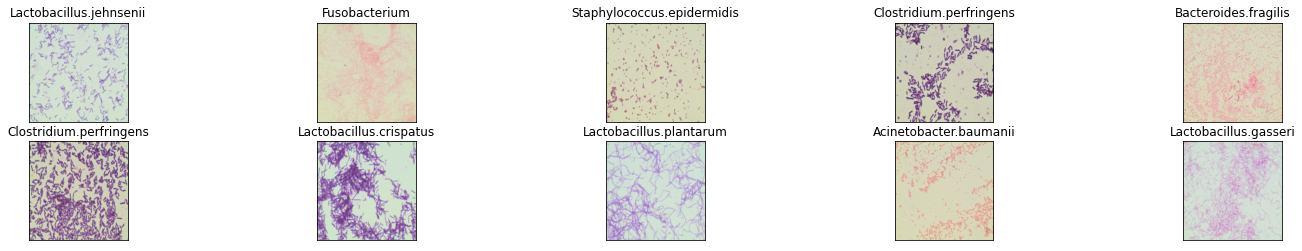

time: 5.88 s (started: 2022-12-07 16:05:50 +00:00)


In [ ]:
original_loader = torch.utils.data.DataLoader(dataset=original, batch_size=64, shuffle=True)
dataset_iterable = iter(original_loader)
images, labels = next(dataset_iterable)
fig = plt.figure(figsize=(25,4))
for i in np.arange(10): #showing sample of 16 images
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  plt.imshow(convert_to_image(images[i]))
  ax.set_title(classes[labels[i].item()])

# Neural Network Construction

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # use gpu for accelerated computation

time: 788 ms (started: 2022-12-07 16:05:55 +00:00)


In [ ]:
model = models.densenet161(pretrained=True) #pretrained model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

time: 2.9 s (started: 2022-12-07 16:05:56 +00:00)


In [ ]:
model.classifier = nn.Sequential(nn.Dropout(p=0.5, inplace=False),
                                 nn.Linear(2208,1000),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.5, inplace=False),
                                 nn.Linear(1000, 33))
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

time: 5.97 s (started: 2022-12-07 16:05:59 +00:00)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

28714033

time: 5.34 ms (started: 2022-12-07 16:06:05 +00:00)


# Neural Network Implementation

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

time: 4.91 ms (started: 2022-12-07 16:06:05 +00:00)


In [ ]:
epochs = 20
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

time: 756 µs (started: 2022-12-07 16:06:05 +00:00)


In [ ]:
torch.random.manual_seed(42)
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:

    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    score, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        val_score, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    print("epoch number: {}".format(e+1))
    print("training loss: {:.4f}".format(epoch_loss))
    print("training acc: {:.4f}".format(epoch_acc.item()))
    print("validation loss: {:.4f}".format(val_epoch_loss))
    print("validation acc: {:.4f}".format(val_epoch_acc.item()))

epoch number: 1
training loss: 0.0998
training acc: 0.6149
validation loss: 0.0302
validation acc: 0.8803
epoch number: 2
training loss: 0.0219
training acc: 0.9066
validation loss: 0.0165
validation acc: 0.9329
epoch number: 3
training loss: 0.0119
training acc: 0.9506
validation loss: 0.0135
validation acc: 0.9429
epoch number: 4
training loss: 0.0085
training acc: 0.9630
validation loss: 0.0098
validation acc: 0.9483
epoch number: 5
training loss: 0.0058
training acc: 0.9739
validation loss: 0.0079
validation acc: 0.9655
epoch number: 6
training loss: 0.0054
training acc: 0.9769
validation loss: 0.0061
validation acc: 0.9746
epoch number: 7
training loss: 0.0040
training acc: 0.9837
validation loss: 0.0065
validation acc: 0.9755
epoch number: 8
training loss: 0.0045
training acc: 0.9816
validation loss: 0.0066
validation acc: 0.9737
epoch number: 9
training loss: 0.0055
training acc: 0.9753
validation loss: 0.0050
validation acc: 0.9746
epoch number: 10
training loss: 0.0030
trainin

Plots of loss and accuracy

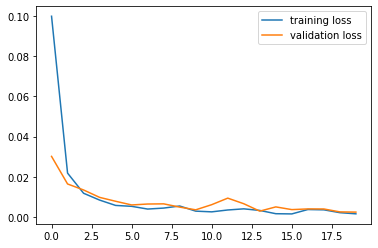

time: 269 ms (started: 2022-12-07 17:27:11 +00:00)


In [ ]:
plt.plot(running_loss_history, label="training loss")
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

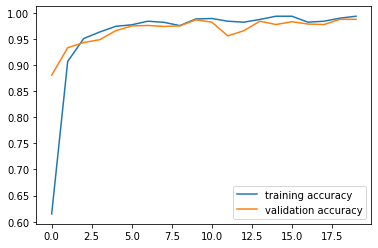

time: 164 ms (started: 2022-12-07 17:27:11 +00:00)


In [ ]:
for i in range(len(running_corrects_history)):
  running_corrects_history[i] = running_corrects_history[i].cpu()

for i in range(len(val_running_corrects_history)):
  val_running_corrects_history[i] = val_running_corrects_history[i].cpu()

plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

Sample of Dataset Classification

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

time: 437 ms (started: 2022-12-07 17:27:11 +00:00)


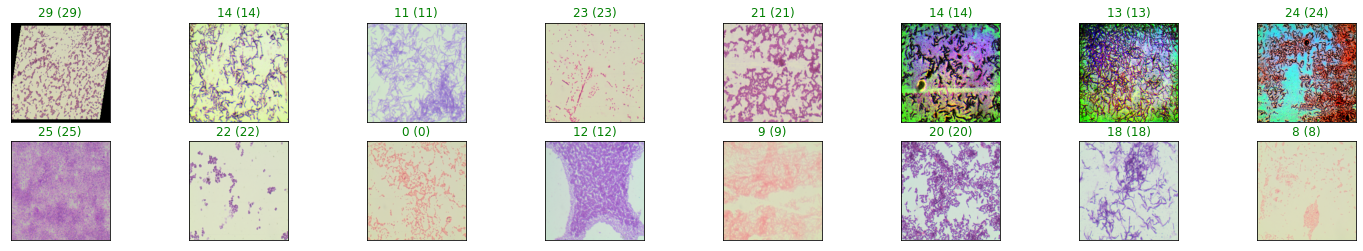

time: 954 ms (started: 2022-12-07 17:27:12 +00:00)


In [ ]:
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(16):
  ax = fig.add_subplot(2, 8, idx+1, xticks=[], yticks=[])
  plt.imshow(convert_to_image(images[idx].cpu()))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))

# Confusion Matrix

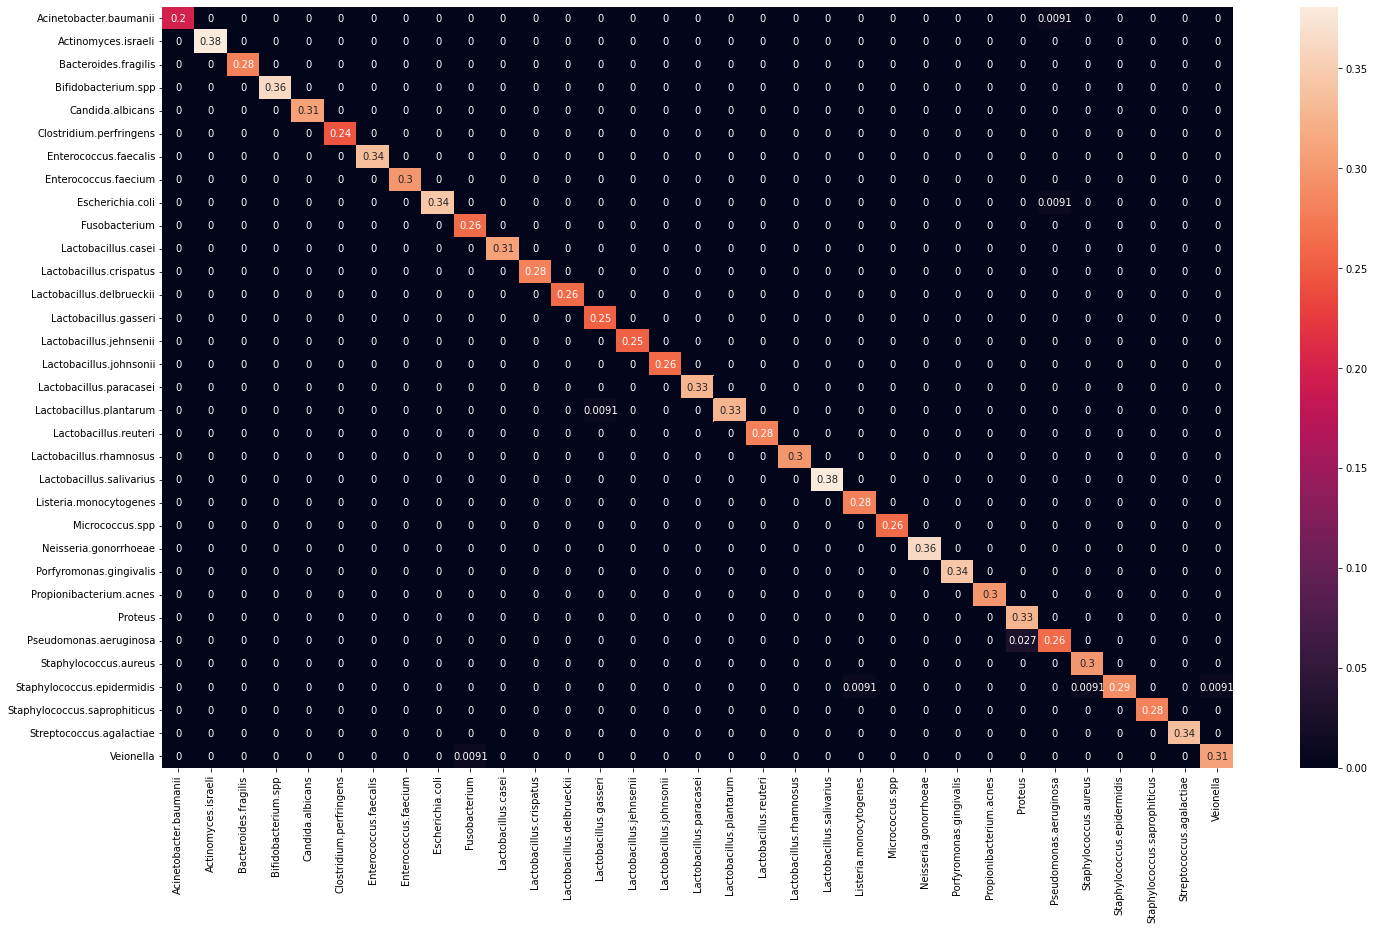

time: 39 s (started: 2022-12-07 17:27:13 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

test_running_corrects = 0.0

# iterate over test data
for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)

        test_loss = criterion(output, labels)
        test_score, test_preds = torch.max(output, 1)
        test_running_corrects += torch.sum(test_preds == labels.data)

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output)

        labels = labels.data.cpu().numpy()
        y_true.extend(labels)

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (24,14))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
import sklearn
sklearn.metrics.precision_recall_fscore_support(y_true, y_pred, average = "weighted")

(0.9912010253475947, 0.9909338168631007, 0.9908987715767354, None)

time: 16.3 ms (started: 2022-12-07 17:27:52 +00:00)


In [2]:
test_epoch_acc = test_running_corrects.float()/len(test_loader.dataset)
print("test acc: {:.6f}".format(test_epoch_acc.item()))

test acc: 0.981708
time: 1.01 ms (started: 2022-12-07 17:27:52 +00:00)
